<a href="https://colab.research.google.com/github/Pallavirampal/Deep_learning/blob/main/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

X_train.shape: (60000, 28, 28)
X_test.shape:  (10000, 28, 28)


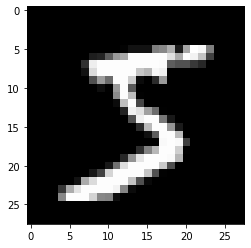

In [8]:
mnist = tf.keras.datasets.mnist
(X_train, train_labels), (X_test, test_labels) = mnist.load_data()
print("X_train.shape:",X_train.shape)
print("X_test.shape: ",X_test.shape)
first_img = X_train[0]
# uncomment this line to see the pixel values
#print(first_img)
plt.imshow(first_img, cmap='gray')
plt.show()


In [9]:
train_images = X_train.reshape((60000, 28, 28,1))  # to match the input shape of the neural network.60000 images each of size 28X28 and 1 colour channel
test_images = X_test.reshape((10000, 28, 28, 1))
# Normalize pixel values: from the range 0-255 to the range 0-1
train_images, test_images = train_images/255.0,test_images/255.0
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3, 3),activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3),activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=1)


1875/1875 [==============================] - 36s 19ms/step - loss: 0.1585 - accuracy: 0.9504


313/313 [==============================] - 2s 7ms/step - loss: 0.0462 - accuracy: 0.9845
0.984499990940094


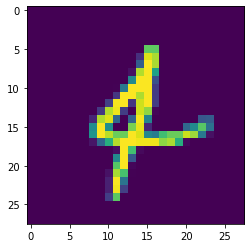

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
# predict the label of one image
test_image = np.expand_dims(test_images[300], axis = 0)
plt.imshow(test_image.reshape(28,28))
plt.show()



In [13]:
result=model.predict(test_images)
result

array([[4.6644666e-09, 1.8140497e-06, 1.0765226e-06, ..., 9.9999428e-01,
        6.9295254e-07, 7.6207476e-07],
       [3.4576082e-05, 1.3969640e-05, 9.9992657e-01, ..., 5.3119031e-10,
        2.0961977e-05, 3.0363143e-11],
       [1.3446802e-06, 9.9976391e-01, 1.5127103e-05, ..., 7.6148601e-05,
        8.0988510e-05, 6.2147529e-07],
       ...,
       [1.2981778e-09, 6.1741997e-07, 3.6928022e-08, ..., 9.8482333e-06,
        1.0385274e-05, 1.2079738e-06],
       [7.7763274e-05, 5.8476309e-07, 2.1437163e-06, ..., 4.6213984e-09,
        2.1710888e-01, 1.4864222e-06],
       [2.6115358e-05, 6.1305116e-08, 2.1215687e-05, ..., 1.3004544e-09,
        2.0393531e-05, 1.0458742e-08]], dtype=float32)